# What is Deep Learning?

Deep learning is a class of machine learning algorithms that use several layers of nonlinear processing units for feature extraction and transformation. Each successive layer uses the output from the previous layer as input.
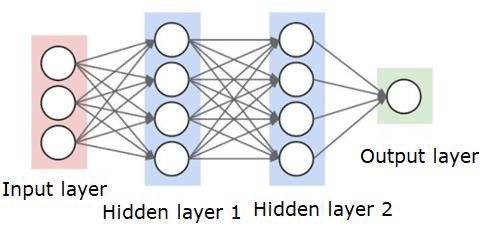

Deep neural networks, deep belief networks and recurrent neural networks have been applied to fields such as computer vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, and bioinformatics where they produced results comparable to and in some cases better than human experts have.


# What is Deep Learning?

Deep learning is an approach to machine learning characterized by deep stacks of computations. This depth of computation is what has enabled deep learning models to disentangle the kinds of complex and hierarchical patterns found in the most challenging real-world datasets.

Some of the most impressive advances in artificial intelligence in recent years have been in the field of deep learning. Natural language translation, image recognition, and game playing are all tasks where deep learning models have neared or even exceeded human-level performance.


Through their power and scalability, `neural networks` have become the defining model of deep learning. And Neural networks are composed of `neurons`, where each neuron individually performs only a simple computation. The power of a neural network comes from the complexity of the connections these neurons can form.

# The Linear Unit

So let's begin with the fundamental component of a neural network: the individual neuron. As a diagram, a neuron (or unit) with one input looks like:

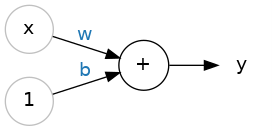
                                        
                                        **The Linear Unit: y=wx+by=wx+b**

1. The input is `x`. Its connection to the neuron has a weight which is w. Whenever a value flows through a connection, you multiply the value by the connection's weight. For the input x, what reaches the neuron is `w * x`. 

`A neural network "learns" by modifying its weights.`



2. The `b` is a special kind of weight we call the bias. The bias doesn't have any input data associated with it; instead, we put a 1 in the diagram so that the value that reaches the neuron is just b (since 1 * b = b). 

`The bias enables the neuron to modify the output independently of its inputs.`


3. The `y` is the value the neuron ultimately(predict) outputs. To get the output, the neuron sums up all the values it receives through its connections. 

This neuron's activation is y = w * x + b, or as a formula y=wx+by=wx+b.




# Multiple Inputs
 We can just add more input connections to the neuron, one for each additional feature. To find the output, we would multiply each input to its connection weight and then add them all together.
 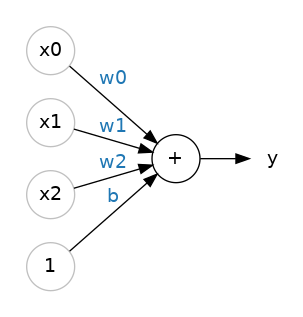
 
			A linear unit with three inputs.
            
The formula for this neuron would be y=w0x0+w1x1+w2x2+by=w0x0+w1x1+w2x2+b. A linear unit with two inputs will fit a `plane`, and a unit with more inputs than that will fit a `hyperplane.`


# Linear Units in Keras
The easiest way to create a model in Keras is through `keras.Sequential`, which creates a neural network as a stack of layers. We can create models like those above using a dense layer 

In [169]:
# adding dropout layers to the model
keras.Sequential([
# ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])


In [1]:
pip --version

pip 22.2.2 from C:\Users\HP\anaconda3\lib\site-packages\pip (python 3.9)Note: you may need to restart the kernel to use updated packages.




In [2]:
pip install --upgrade pip

     ---------------------------------------- 1.8/1.8 MB 65.2 kB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [8]:
#pip install tensorflow --timeout 120

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from tensorflow import keras
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("winequality-red.csv")

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Seperate the target from the features
x = df.copy()
y = x.pop("quality")

In [15]:
# Split the data into train and val set
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Step one: Build the network

keras.Sequential( [
    layers.Dense(units=16)
    layers.Activation("relu") # normal network
    
    layers.Dense(unit=1)
    
])


keras.Sequential( [
    layers.Dense(units=32) 
    layers.Activation("relu") # wider network
    
    layers.Dense(unit=1)
    
])

keras.Sequential( [
    layers.Dense(units=16)
    layers.Activation("relu") # deeper network
    
    layers.Dense(unit=1)

])

In [26]:
network = keras.Sequential( [
    
   layers.Dense(units=1500, input_shape=[11]), # input layer
   layers.Dropout(0.02),
   layers.BatchNormalization(),
   layers.Activation("relu"),
    
   layers.Dense(units=1500), 
   layers.Dropout(0.02),
   layers.BatchNormalization(),
   layers.Activation("tanh"), # first hidden layers
   
   layers.Dense(units=1500), # second hidden layers
   layers.Dropout(0.02),
   layers.BatchNormalization(),
   layers.Activation("sigmoid"),
    
   layers.Dense(units=1) # output
    
]  )

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step Two: Compile the model

i.e. figure the problem, and state how to solve

In [27]:
network.compile(optimizer='adam', loss="mae", metrics=["mae"])

# Step Three: Train the model

In [28]:
stop = callbacks.EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)

In [29]:
hs = network.fit(x=x_train,
    y=y_train,
    batch_size=600,
    epochs=100, validation_data=(x_val, y_val), callbacks=[stop])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - loss: 4.0757 - mae: 4.0757 - val_loss: 0.9537 - val_mae: 0.9537
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1.0982 - mae: 1.0982 - val_loss: 0.7429 - val_mae: 0.7429
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.7401 - mae: 0.7401 - val_loss: 0.9949 - val_mae: 0.9949
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.8691 - mae: 0.8691 - val_loss: 0.6512 - val_mae: 0.6512
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.6878 - mae: 0.6878 - val_loss: 0.6557 - val_mae: 0.6557
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6508 - mae: 0.6508 - val_loss: 0.7131 - val_mae: 0.7131
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.6948 - mae: 0.6948 - val_loss: 0.7239 - val_mae: 0.7239
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6986 - mae: 0.6986 - val_loss: 0.6627 - val_mae: 0.6627
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6487 - mae:

<AxesSubplot:>

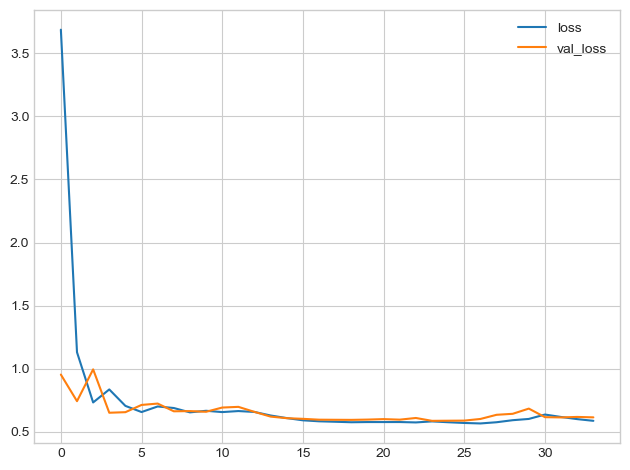

In [30]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
      titleweight='bold', titlesize=18, titlepad=10)

import pandas as pd

pd.DataFrame(hs.history)[["loss", "val_loss"]].plot()

<AxesSubplot:>

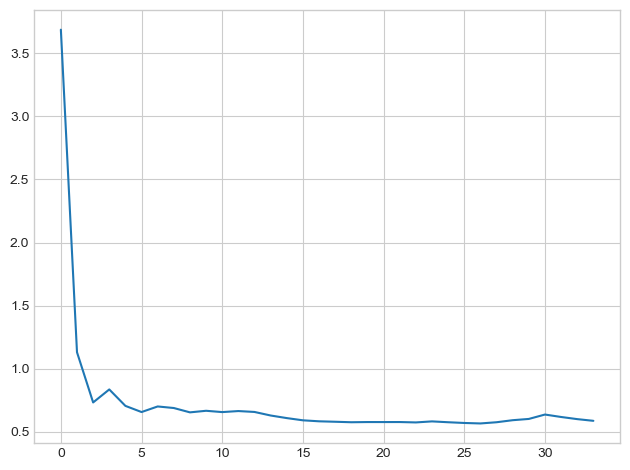

In [31]:
pd.Series(hs.history["loss"]).plot()

In [17]:
10,
5

5

In [18]:
y = 5 * .5 + 1
y

3.5

In [19]:
10 - 3.5

6.5

In [ ]:
y = mx + c